In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [68]:
df = pd.read_csv('cian_df_well_done.csv', index_col=0)

In [69]:
df = df.drop(['num', 'Group','NNN'], 1)

In [70]:
df.head()

,Rooms,Price,Totsp,Livesp,Kitsp,Dist,Metrdist,Walk,Brick,Tel,...,house_flat_num,house_entrances,parking_type,pas_lift_num,offer_images_count,offer_similar_num,mortgage_allowed,bti_house_priceCian,offer_allRoomsArea,url
1,3.0,50000000,130.0,80.0,20.0,7.730381,NaN,NaN,1.0,1.0,...,992.0,8.0,multilevel,1.0,NaN,0,NaN,64650000.0,20-20-20-20,https://www.cian.ru/sale/flat/12047605/
6,2.0,9000000,48.0,32.0,7.0,16.536521,7.0,1.0,0.0,0.0,...,239.0,5.0,NaN,2.0,NaN,0,1.0,7950000.0,18- 14,https://www.cian.ru/sale/flat/13244614/
8,2.0,25200000,58.0,49.5,6.0,1.138926,4.0,1.0,1.0,1.0,...,300.0,2.0,NaN,2.0,NaN,0,1.0,24040000.0,24+15,https://www.cian.ru/sale/flat/136737186/
10,3.0,13500000,56.0,41.0,6.0,5.864384,12.0,1.0,0.0,1.0,...,140.0,5.0,NaN,1.0,NaN,0,1.0,10880000.0,18+14+9,https://www.cian.ru/sale/flat/139436062/
14,1.0,7000000,38.0,19.0,10.0,14.106288,NaN,NaN,0.0,0.0,...,320.0,5.0,NaN,1.0,NaN,0,1.0,6700000.0,19,https://www.cian.ru/sale/flat/142961874/


In [71]:
df['Rooms'].describe()

count    15300.000000
mean         2.256013
std          0.758773
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: Rooms, dtype: float64

In [72]:
df['Totsp'].sort_values()

42994     12.90
32677     13.60
35968     15.00
16259     15.90
29519     16.10
          ...  
11713    290.00
26935    290.69
16412    320.00
40815    377.40
49275    496.80
Name: Totsp, Length: 15303, dtype: float64

In [73]:
# df['Totsp'].hist()

In [74]:
df['Totsp'].describe()

count    15303.000000
mean        75.086775
std         35.269990
min         12.900000
25%         50.000000
50%         67.000000
75%         90.000000
max        496.800000
Name: Totsp, dtype: float64

In [75]:
df['logprice'] = np.log(df['Price'])

In [77]:
from scipy import stats

def drop_numerical_outliers(df, z_thresh=3):
    # Constrains will contain `True` or `False` depending on if it is a value below the threshold.
    constrains = df.select_dtypes(include=[np.number]) \
        .apply(lambda x: np.abs(stats.zscore(x)) < z_thresh, reduce=False) \
        .all(axis=1)
    # Drop (inplace) values set to be rejected
    df.drop(df.index[~constrains], inplace=True)

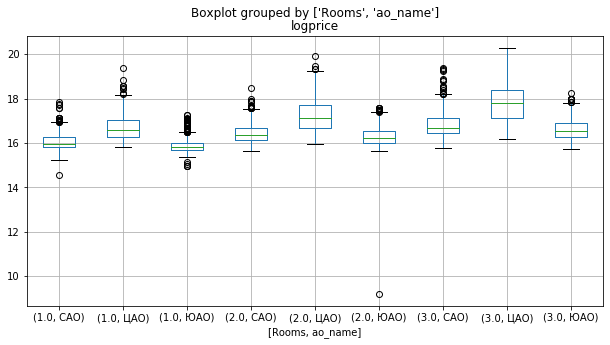

In [86]:
df.boxplot(column='logprice', by=['Rooms', 'ao_name'], figsize=(10, 5))

In [99]:
df = df.loc[df['Rooms'].dropna().index,]

In [102]:
np.unique(df['ao_name'])

array(['САО', 'ЦАО', 'ЮАО'], dtype=object)

In [124]:
df.iloc[:2,].append(df.iloc[:2,])

,Rooms,Price,Totsp,Livesp,Kitsp,Dist,Metrdist,Walk,Brick,Tel,...,house_entrances,parking_type,pas_lift_num,offer_images_count,offer_similar_num,mortgage_allowed,bti_house_priceCian,offer_allRoomsArea,url,logprice
1,3.0,50000000,130.0,80.0,20.0,7.730381,NaN,NaN,1.0,1.0,...,8.0,multilevel,1.0,NaN,0,NaN,64650000.0,20-20-20-20,https://www.cian.ru/sale/flat/12047605/,17.727534
6,2.0,9000000,48.0,32.0,7.0,16.536521,7.0,1.0,0.0,0.0,...,5.0,NaN,2.0,NaN,0,1.0,7950000.0,18- 14,https://www.cian.ru/sale/flat/13244614/,16.012735
1,3.0,50000000,130.0,80.0,20.0,7.730381,NaN,NaN,1.0,1.0,...,8.0,multilevel,1.0,NaN,0,NaN,64650000.0,20-20-20-20,https://www.cian.ru/sale/flat/12047605/,17.727534
6,2.0,9000000,48.0,32.0,7.0,16.536521,7.0,1.0,0.0,0.0,...,5.0,NaN,2.0,NaN,0,1.0,7950000.0,18- 14,https://www.cian.ru/sale/flat/13244614/,16.012735


In [125]:
df1 = df.iloc[:2,]

ar1=[]
ar2=[]
    
for i in range(3): 
    for j in range (3):
        Q1 = df.loc[(df['Rooms']==np.unique(df['Rooms'])[i])&(df['ao_name']==np.unique(df['ao_name'])[j]), 'logprice'].quantile(0.25)
        Q3 = df.loc[(df['Rooms']==np.unique(df['Rooms'])[i])&(df['ao_name']==np.unique(df['ao_name'])[j]), 'logprice'].quantile(0.75)
        IQR = Q3 - Q1    #IQR is interquartile range. 
        
        dd1 = df.loc[(df['Rooms']==np.unique(df['Rooms'])[i])&(df['ao_name']==np.unique(df['ao_name'])[j]),]
        ar1.append(dd1.shape[0])
        dd1 = dd1.loc[(dd1['logprice'] >= Q1 - 1.5 * IQR)&( df['logprice'] <= Q3 + 1.5 *IQR ), ]
        ar2.append(dd1.shape[0])
        
        df1 = df1.append(dd1)

        
#         filter = (df['logprice'] >= Q1 - 1.5 * IQR) & (df['logprice'] <= Q3 + 1.5 *IQR)
#         df.loc[~filter.index]  
        
#         print(,)

        

In [133]:
df1 = df1.loc[df1['house_material']!='wood',]

In [134]:
df1.to_csv('cian_curdata.csv')

In [ ]:
# df.boxplot(column='logprice', by=['Rooms', 'ao_name'], figsize=(10, 5))

In [158]:
Q1 = (df1['Livesp']/df1['Totsp']).quantile(0.25)
Q3 = (df1['Livesp']/df1['Totsp']).quantile(0.75)
IQR = Q3 - Q1 

df3 = df1.loc[((df1['Livesp']/df1['Totsp']) >= Q1 - 1.5 * IQR)&( (df1['Livesp']/df1['Totsp']) <= Q3 + 1.5 *IQR ), ]

df1.shape, df3.shape,  Q1 - 1.5 * IQR, Q3 + 1.5 *IQR 

# Q3

((15169, 58), (11948, 58), 0.3045058139534882, 0.8591569767441862)

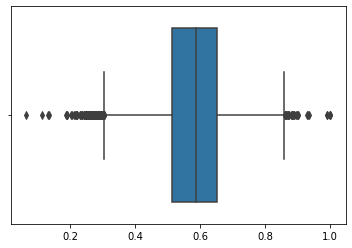

In [148]:
sns.boxplot((df1['Livesp']/df1['Totsp']))

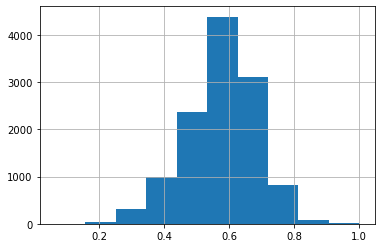

In [155]:
(df1['Livesp']/df1['Totsp']).hist()

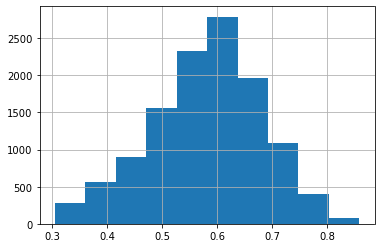

In [156]:
(df3['Livesp']/df3['Totsp']).hist()

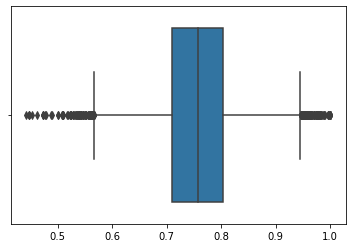

In [163]:
sns.boxplot(((df3['Kitsp']+df3['Livesp'])/df3['Totsp']))

In [164]:
Q1 = ((df3['Kitsp']+df3['Livesp'])/df3['Totsp']).quantile(0.25)
Q3 = ((df3['Kitsp']+df3['Livesp'])/df3['Totsp']).quantile(0.75)
IQR = Q3 - Q1 

df4 = df3.loc[((df3['Kitsp']+df3['Livesp'])/df3['Totsp'] >= Q1 - 1.5 * IQR)& ((df3['Kitsp']+df3['Livesp'])/df3['Totsp'] <= Q3 + 1.5 *IQR ), ]

df3.shape, df4.shape,  Q1 - 1.5 * IQR, Q3 + 1.5 *IQR 

# Q3

((11948, 58), (11188, 58), 0.5672564687851409, 0.9452175688117346)

In [171]:
# sns.(((df4['Kitsp'])/df4['Totsp']))

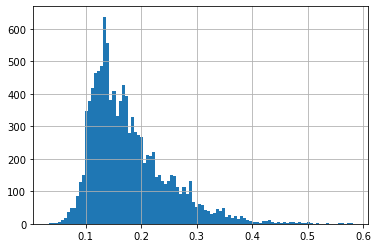

In [173]:
((df4['Kitsp'])/df4['Totsp']).hist(bins=100)

In [176]:
sum()
sum(((df4['Kitsp'])/df4['Totsp'])>0.4)

104

In [177]:
df5 = df4.loc[((df4['Kitsp'])/df4['Totsp'])>0.1, ]
df5 = df5.loc[((df5['Kitsp'])/df5['Totsp'])<0.4, ]

In [194]:
df5 = df5.loc[df5['Totsp']>33, ]
df5 = df5.loc[df5['Totsp']<200, ]

In [200]:
df5 = df5.loc[df5['Kitsp']<45, ]

In [207]:
df5 = df5.loc[df5['Kitsp']>5, ]

In [212]:
df5 = df5.loc[df5['Livesp']<120, ]

In [220]:
df5 = df5.loc[df5['Livesp']>14, ]

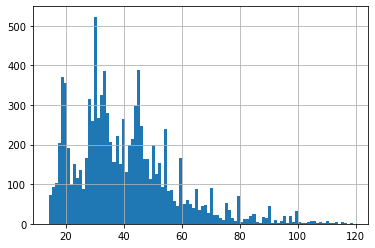

In [221]:
df5['Livesp'].hist(bins=100)

In [304]:
df5 = pd.read_csv('cian_curdata.csv', index_col=0)

In [310]:
df5

,Rooms,Price,Totsp,Livesp,Kitsp,Dist,Metrdist,Walk,Brick,Tel,...,house_entrances,parking_type,pas_lift_num,offer_images_count,offer_similar_num,mortgage_allowed,bti_house_priceCian,offer_allRoomsArea,url,logprice
1,3.0,50000000,130.0,80.0,20.0,7.730381,NaN,NaN,1.0,1.0,...,8.0,multilevel,1.0,NaN,0,NaN,64650000.0,20-20-20-20,https://www.cian.ru/sale/flat/12047605/,17.727534
6,2.0,9000000,48.0,32.0,7.0,16.536521,7.0,1.0,0.0,0.0,...,5.0,NaN,2.0,NaN,0,1.0,7950000.0,18- 14,https://www.cian.ru/sale/flat/13244614/,16.012735
14,1.0,7000000,38.0,19.0,10.0,14.106288,NaN,NaN,0.0,0.0,...,5.0,NaN,1.0,NaN,0,1.0,6700000.0,19,https://www.cian.ru/sale/flat/142961874/,15.761421
32,1.0,13100000,48.0,23.0,13.0,14.981151,2.0,1.0,1.0,NaN,...,1.0,underground,2.0,3.0,0,0.0,9600000.0,23,https://www.cian.ru/sale/flat/148332374/,16.388123
827,1.0,7990000,38.0,19.0,8.0,15.029500,10.0,1.0,0.0,1.0,...,6.0,ground,1.0,NaN,0,0.0,7160000.0,19,https://www.cian.ru/sale/flat/189013281/,15.893701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51376,3.0,18250000,92.0,42.0,23.0,18.557365,15.0,1.0,NaN,NaN,...,NaN,NaN,1.0,24.0,0,NaN,NaN,NaN,https://www.cian.ru/sale/flat/230724104/,16.719676
51458,3.0,8500000,58.7,43.1,6.0,18.671707,6.0,0.0,0.0,NaN,...,14.0,NaN,1.0,NaN,0,1.0,6950000.0,19-13-11.1,https://www.cian.ru/sale/flat/230743139/,15.955577
51475,3.0,10900000,62.0,40.0,7.0,16.392882,10.0,1.0,0.0,NaN,...,NaN,open,NaN,NaN,0,NaN,NaN,10-14-16,https://www.cian.ru/sale/flat/230744768/,16.204273
51498,3.0,20990000,74.8,43.7,10.0,6.446841,9.0,1.0,1.0,NaN,...,NaN,underground,2.0,NaN,0,1.0,NaN,"17,34-14-12",https://www.cian.ru/sale/flat/230748490/,16.859557


In [293]:
sum(df5['ceiling_height']>4)

44

In [306]:
df5 = df5.loc[(df5['ceiling_height']<4)|(df5['ceiling_height'].isna()), ]

In [309]:
df5 = df5.loc[(df5['ceiling_height']>2.4)|(df5['ceiling_height'].isna()), ]

In [331]:
df5 = df5.loc[(df5['Metrdist']<20)|(df5['Metrdist'].isna()), ]

In [350]:
df5['building_age'] = 2020 - df5['building_age']

/home/xenakas/anaconda3/envs/geoplots3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [359]:
df5.loc[(df5['building_age'].isna()&(df5['New']==1)), 'building_age'] = 0 

/home/xenakas/anaconda3/envs/geoplots3.6/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [363]:
sum(df5['building_age']>150)

14

In [366]:
df5 = df5.loc[(df5['building_age']<130)|(df5['building_age'].isna()), ]

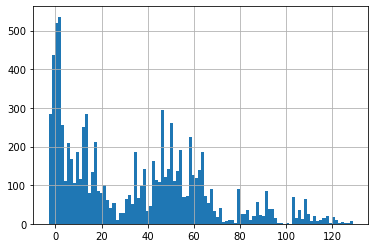

In [367]:
df5['building_age'].hist(bins = 100)

In [333]:
# df5['Metrdist'].hist(bins=10) 

In [270]:
sum(df5['ceiling_height']<2.4)

11

In [ ]:
df5.loc[(df5['Floor']==1)&(df5['Bal'].isna()),'Bal'] = 0

In [345]:
df5 = df5.loc[(df5['flat_lat']<55.91), ]

In [346]:
# sum(df5['flat_lat']>55.91)

In [369]:
df5.to_csv('cian_curdata.csv')

In [ ]:
df5.to_csv('cian_curdata.csv')

In [388]:
df5.describe().to_csv('cian_description_2.csv')

In [387]:
# df5.isna().sum()

In [327]:
sum(df5['Metrdist']>20) 

66

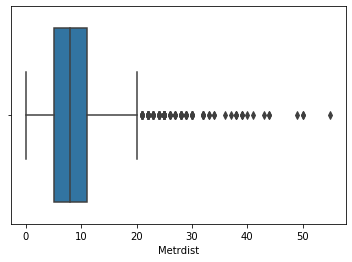

In [328]:
sns.boxplot(df5['Metrdist'])

In [238]:
# df5.isna().sum()

In [217]:
sum(df5['Livesp']<14)

50

In [408]:
df5 = pd.read_csv('cian_curdata.csv', index_col=0)

In [ ]:
df5['Totsp'].hist(bins=100)

In [201]:
min(df5['Kitsp'])

4.0

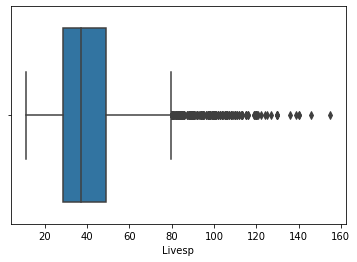

In [211]:
sns.boxplot(df5['Livesp'])

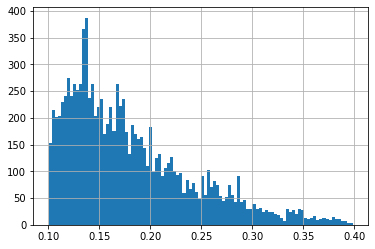

In [178]:
((df5['Kitsp'])/df5['Totsp']).hist(bins=100)

In [398]:
df.shape, df1.shape

((15300, 58), (15169, 58))

In [406]:
# for i in 

min((df5['FlatLat'] - 55.779874)**2+(df5['FlatLon'] - 37.573995)**2)

5.048709793414476e-29

In [397]:
df5.loc[df5['DistrictName'].isna(), 'FlatLat':]

,FlatLat,FlatLon,MetroColor,MetroName,AOName,DistrictName,AvgAge,AvgSqmPr,AvgRentPr,Height,...,TotFlatNum,EntrancesNum,ParkingType,PasLiftNum,ImagesNum,SimilarNum,MortgageAllowed,AllRoomsArea,Url,LogPrice
12,55.779874,37.573995,00701A,Белорусская,САО,NaN,NaN,NaN,NaN,3.20,...,NaN,NaN,NaN,1.0,17.0,0,1.0,27.4,https://www.cian.ru/sale/flat/203203125/,16.859557
13,55.854960,37.559036,8AD02A,Верхние Лихоборы,САО,NaN,NaN,NaN,NaN,2.80,...,NaN,NaN,open,2.0,23.0,0,1.0,15.2,https://www.cian.ru/sale/flat/203366144/,15.833651
14,55.854960,37.559036,8AD02A,Верхние Лихоборы,САО,NaN,NaN,NaN,NaN,2.80,...,NaN,NaN,open,2.0,23.0,0,1.0,16.5,https://www.cian.ru/sale/flat/203366163/,15.930442
28,55.862378,37.542689,8AD02A,Селигерская,САО,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,underground,2.0,13.0,0,1.0,NaN,https://www.cian.ru/sale/flat/211917953/,15.919645
31,55.782341,37.508615,94007C,Полежаевская,САО,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,open,1.0,NaN,0,1.0,18.10,https://www.cian.ru/sale/flat/213222208/,16.164697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8716,55.699106,37.634721,00701A,Автозаводская,ЮАО,NaN,NaN,NaN,NaN,3.20,...,NaN,NaN,NaN,1.0,25.0,0,1.0,14.2-13.5-21.4,https://www.cian.ru/sale/flat/230538541/,16.642232
8749,55.583710,37.581628,ACBFE3,Лесопарковая,ЮАО,NaN,NaN,NaN,NaN,3.00,...,NaN,NaN,underground,1.0,33.0,0,1.0,33.77,https://www.cian.ru/sale/flat/230683685/,16.425561
8757,55.602566,37.734183,00701A,Домодедовская,ЮАО,NaN,NaN,NaN,NaN,2.64,...,NaN,NaN,NaN,1.0,24.0,0,NaN,NaN,https://www.cian.ru/sale/flat/230724104/,16.719676
8759,55.621612,37.725370,8AD02A,Шипиловская,ЮАО,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,open,NaN,NaN,0,NaN,10-14-16,https://www.cian.ru/sale/flat/230744768/,16.204273


In [411]:
df = pd.read_csv('cian_curdata.csv', index_col=0)

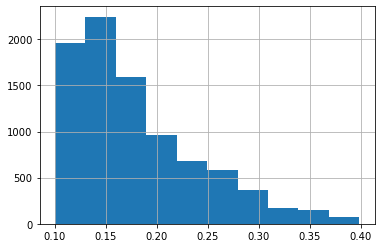

In [416]:
df['KitspShare'].hist()

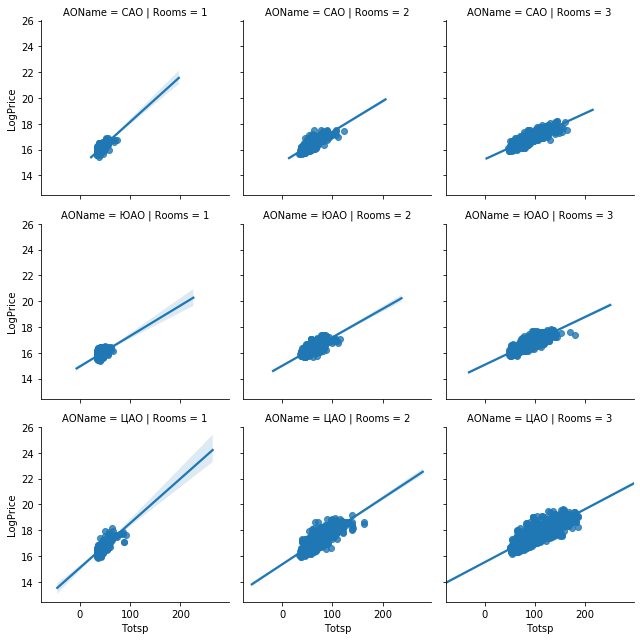

In [414]:
sns.lmplot(data=df.loc[df['Totsp']<200], y="LogPrice", x="Totsp",
           col="Rooms", row='AOName', fit_reg=True, size=3)



In [429]:
df.columns

Index(['X.1', 'X', 'Rooms', 'Price', 'Totsp', 'Livesp', 'Kitsp', 'Dist',
       'Metrdist', 'Walk', 'Brick', 'Tel', 'Bal', 'Floor', 'New', 'Floors',
       'NFloor', 'floor1', 'floor2', 'N', 'NE', 'E', 'SE', 'S', 'SW', 'W',
       'NW', 'Centr', 'Zelen', 'PegToCur', 'FlatLat', 'FlatLon', 'MetroColor',
       'MetroName', 'AOName', 'DistrictName', 'AvgAge', 'AvgSqmPr',
       'AvgRentPr', 'Height', 'Demolish', 'HouseAge', 'HouseMaterial',
       'BalNum', 'LoggiasNum', 'WCCombinedNum', 'WCSeparateNum', 'RemontType',
       'WindowView', 'TotFlatNum', 'EntrancesNum', 'ParkingType', 'PasLiftNum',
       'ImagesNum', 'SimilarNum', 'MortgageAllowed', 'AllRoomsArea', 'Url',
       'LogPrice', 'RoomspMean', 'KitspShare', 'ClosestNeighbour',
       'ClosestNeighbourKm', 'AgeDiff', 'AvgFloor', 'FloorDiff'],
      dtype='object')

In [441]:
# df.columns
dfp = df.loc[:,[ 'LogPrice', 'Totsp', 'RoomspMean', 'KitspShare', 'AOName']]
# [:'']

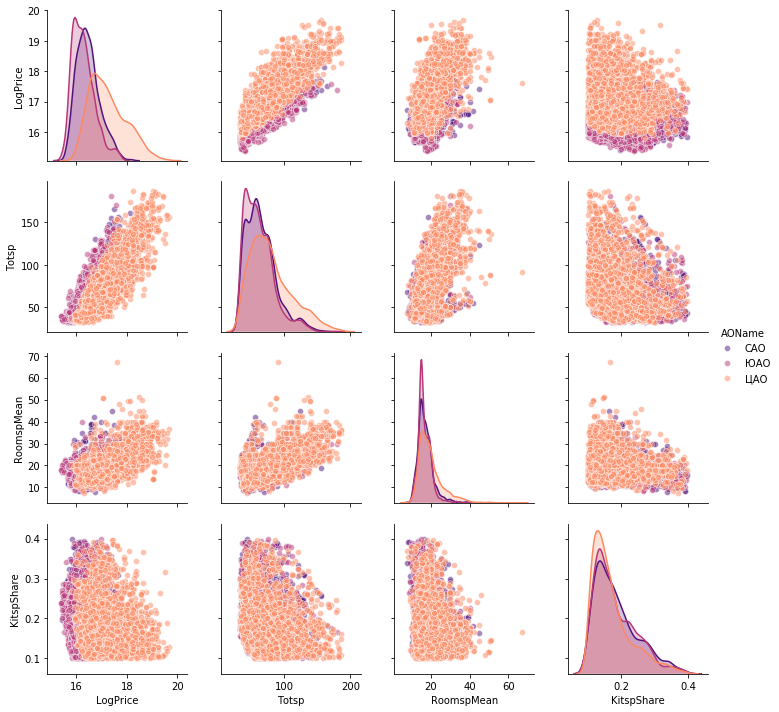

In [442]:
sns.pairplot(dfp, hue='AOName', kind='scatter', diag_kind='kde', palette='magma', plot_kws={'alpha': 0.5});

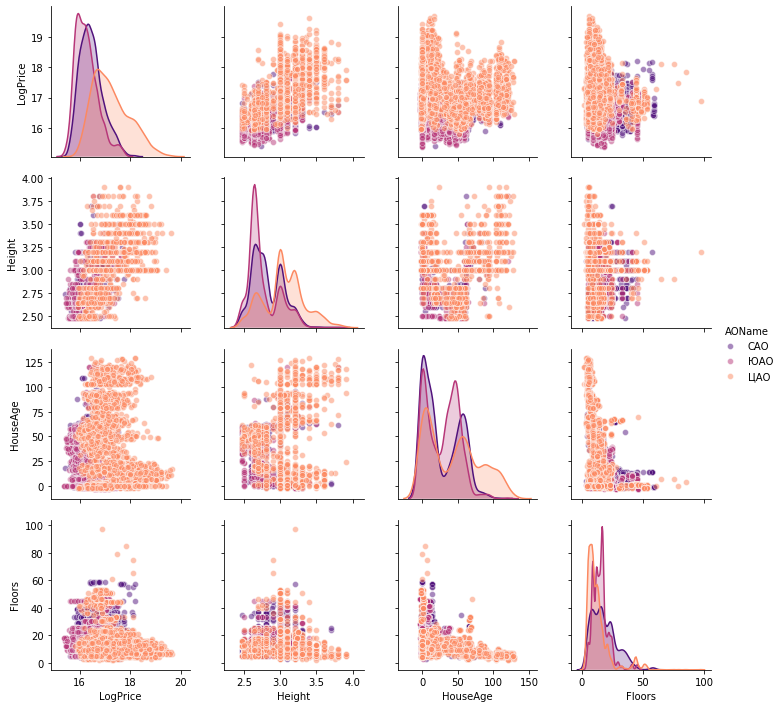

In [450]:
# df.columns
dfp = df.loc[:,[ 'LogPrice', 'Height', 'HouseAge', 'Floors', 'AOName']]
sns.pairplot(dfp, hue='AOName', kind='scatter', diag_kind='kde', palette='magma', plot_kws={'alpha': 0.5});
# [:'']

In [445]:
df.columns

Index(['X.1', 'X', 'Rooms', 'Price', 'Totsp', 'Livesp', 'Kitsp', 'Dist',
       'Metrdist', 'Walk', 'Brick', 'Tel', 'Bal', 'Floor', 'New', 'Floors',
       'NFloor', 'floor1', 'floor2', 'N', 'NE', 'E', 'SE', 'S', 'SW', 'W',
       'NW', 'Centr', 'Zelen', 'PegToCur', 'FlatLat', 'FlatLon', 'MetroColor',
       'MetroName', 'AOName', 'DistrictName', 'AvgAge', 'AvgSqmPr',
       'AvgRentPr', 'Height', 'Demolish', 'HouseAge', 'HouseMaterial',
       'BalNum', 'LoggiasNum', 'WCCombinedNum', 'WCSeparateNum', 'RemontType',
       'WindowView', 'TotFlatNum', 'EntrancesNum', 'ParkingType', 'PasLiftNum',
       'ImagesNum', 'SimilarNum', 'MortgageAllowed', 'AllRoomsArea', 'Url',
       'LogPrice', 'RoomspMean', 'KitspShare', 'ClosestNeighbour',
       'ClosestNeighbourKm', 'AgeDiff', 'AvgFloor', 'FloorDiff'],
      dtype='object')